In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tqdm.notebook import tqdm
import urllib.request
from zipfile import ZipFile
# Setting plots parameters
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import warnings
warnings.filterwarnings("ignore")

In [2]:
# download data from UCI
# ref https://archive-beta.ics.uci.edu/ml/datasets/228
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
urllib.request.urlretrieve(url, 'sms_spam.zip')
# extract file
with ZipFile('sms_spam.zip', 'r') as zipObj:
   zipObj.extractall()

In [3]:
data_raw = pd.read_csv('SMSSpamCollection',sep='\t',names=['Category','Message'])
data_raw['Category']=data_raw['Category'].astype('category')
data_raw['Category_num'] = data_raw['Category'].cat.codes


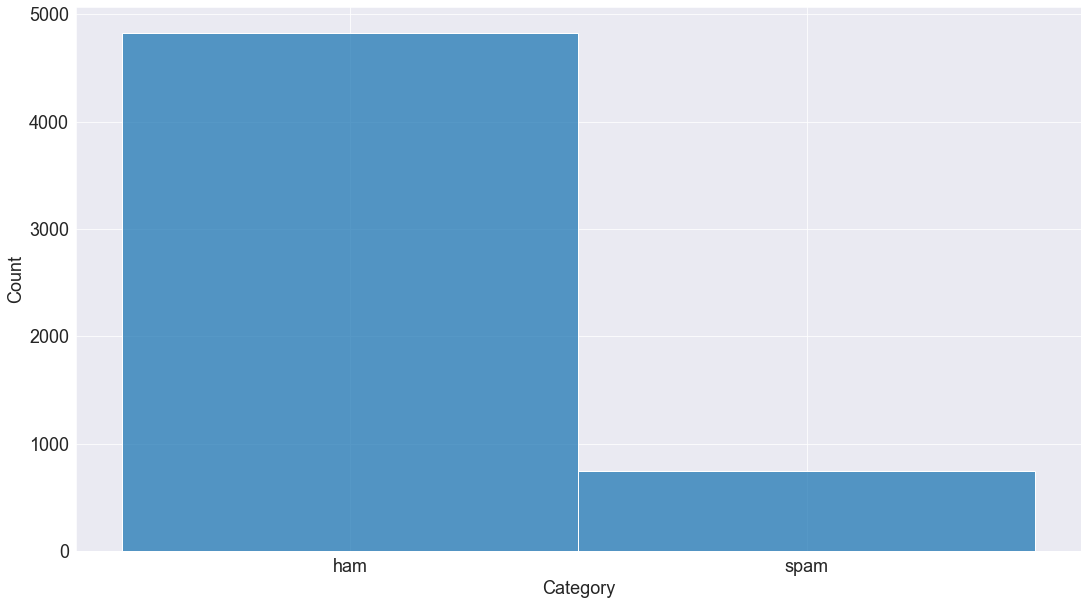

In [4]:
fig = sns.histplot(data_raw['Category']);

In [5]:
#extract the basic characters of the texts
lowercase ='abcdefghijklmnopqrstuvwxyz'
uppercase ='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
symbols='#!/\$%?&*()_+-^[]{|}><~;:.,»«@£="'+"'"
numbers='0123456789'

In [6]:
def lower_score(text):
    return sum([char_ in lowercase for char_ in text])/len(text)

def upper_score(text):
    return sum([char_ in uppercase for char_ in text])/len(text)

def symbol_score(text):
    return sum([char_ in symbols for char_ in text])/len(text)

def number_score(text):
    return sum([char_ in numbers for char_ in text])/len(text)

def space_score(text):
    return sum([char_ in ' ' for char_ in text])/len(text)

def length(text):
    return len(text)

In [7]:
data_raw['lower_score'] = data_raw['Message'].apply(lower_score)
data_raw['upper_score'] = data_raw['Message'].apply(upper_score)
data_raw['number_score'] = data_raw['Message'].apply(number_score)
data_raw['symbol_score'] = data_raw['Message'].apply(symbol_score)
data_raw['space_score'] = data_raw['Message'].apply(space_score)
data_raw['length'] = data_raw['Message'].apply(length)

In [8]:
data_raw.head(10)

,Category,Message,Category_num,lower_score,upper_score,number_score,symbol_score,space_score,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,0.720721,0.027027,0.000000,0.081081,0.171171,111
1,ham,Ok lar... Joking wif u oni...,0,0.551724,0.068966,0.000000,0.206897,0.172414,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,0.561290,0.064516,0.161290,0.038710,0.174194,155
3,ham,U dun say so early hor... U c already then say...,0,0.632653,0.040816,0.000000,0.122449,0.204082,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0.737705,0.032787,0.000000,0.032787,0.196721,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,0.653061,0.047619,0.027211,0.061224,0.210884,147
6,ham,Even my brother is not like to speak with me. ...,0,0.753247,0.025974,0.000000,0.025974,0.194805,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,0.737500,0.062500,0.006250,0.037500,0.156250,160
8,spam,WINNER!! As a valued network customer you have...,1,0.598726,0.076433,0.121019,0.044586,0.159236,157
9,spam,Had your mobile 11 months or more? U R entitle...,1,0.629870,0.090909,0.084416,0.012987,0.181818,154


In [9]:
# standardize all newly created features
std_g = np.std(data_raw['length'])
mean_g = np.mean(data_raw['length'])
data_raw['length_std'] = (data_raw['length']-mean_g)/std_g

std_l = np.std(data_raw['lower_score'])
mean_l = np.mean(data_raw['lower_score'])
data_raw['lower_score_std'] = (data_raw['lower_score']-mean_l)/std_l

std_c = np.std(data_raw['upper_score'])
mean_c = np.mean(data_raw['upper_score'])
data_raw['upper_score_std'] = (data_raw['upper_score']-mean_c)/std_c

std_n = np.std(data_raw['number_score'])
mean_n = np.mean(data_raw['number_score'])
data_raw['number_score_std'] = (data_raw['number_score']-mean_n)/std_n

std_s = np.std(data_raw['symbol_score'])
mean_s = np.mean(data_raw['symbol_score'])
data_raw['symbol_score_std'] = (data_raw['symbol_score']-mean_s)/std_s

std_p = np.std(data_raw['space_score'])
mean_p = np.mean(data_raw['space_score'])
data_raw['space_score_std'] = (data_raw['space_score']-mean_p)/std_p



In [10]:
data_raw.groupby('Category').mean()

,Category_num,lower_score,upper_score,number_score,symbol_score,space_score,length,length_std,lower_score_std,upper_score_std,number_score_std,symbol_score_std,space_score_std
Category,,,,,,,,,,,,,
ham,0,0.693129,0.058196,0.004241,0.061730,0.181630,71.482487,-0.150281,0.129469,-0.064744,-0.304418,0.040955,0.065530
spam,1,0.563916,0.110913,0.116537,0.044052,0.164493,138.670683,0.970690,-0.836261,0.418195,1.966286,-0.264537,-0.423267


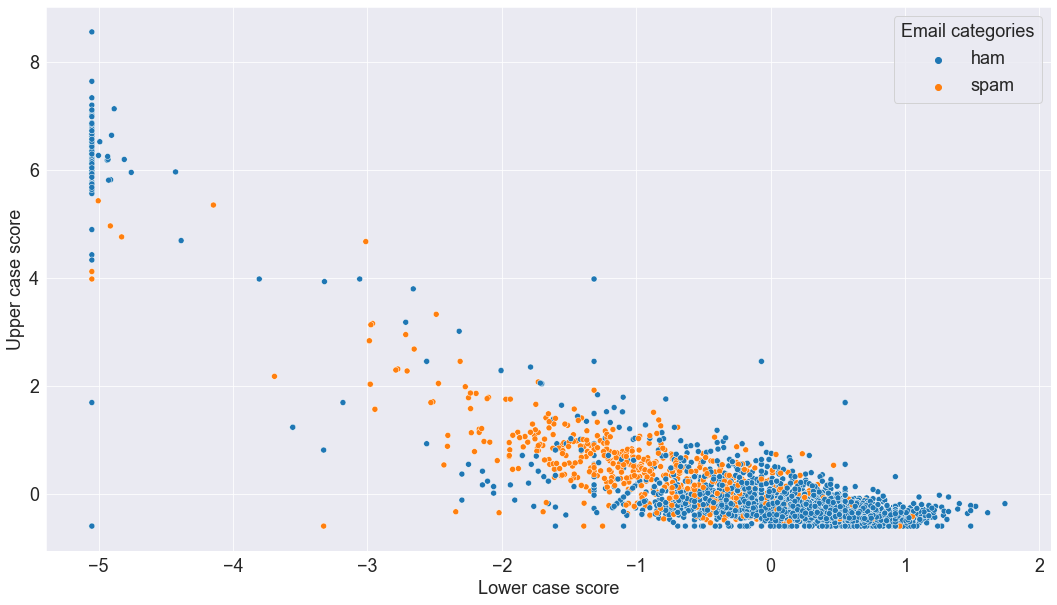

In [12]:
fig = sns.scatterplot(x='lower_score_std',y='upper_score_std',hue='Category',data=data_raw);
fig.set(ylabel = 'Upper case score', xlabel = 'Lower case score', Title='');
fig.legend(title='Email categories');

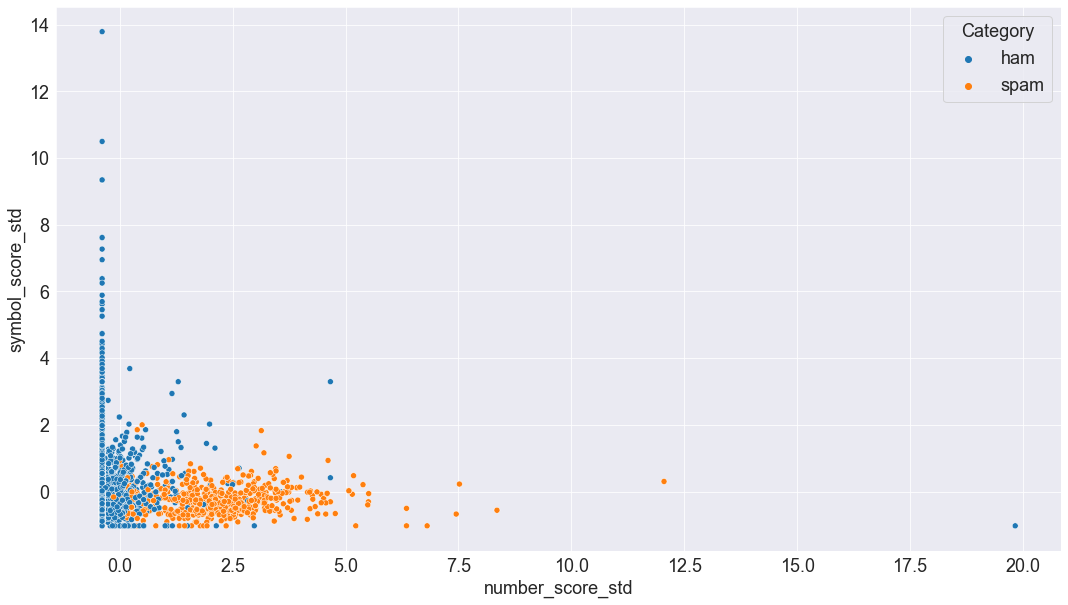

In [13]:
sns.scatterplot(x='number_score_std',y='symbol_score_std',hue='Category',data=data_raw);
fig.set(ylabel = 'Symbols score', xlabel = 'Numbers score', Title='');
fig.legend(title='Email categories');

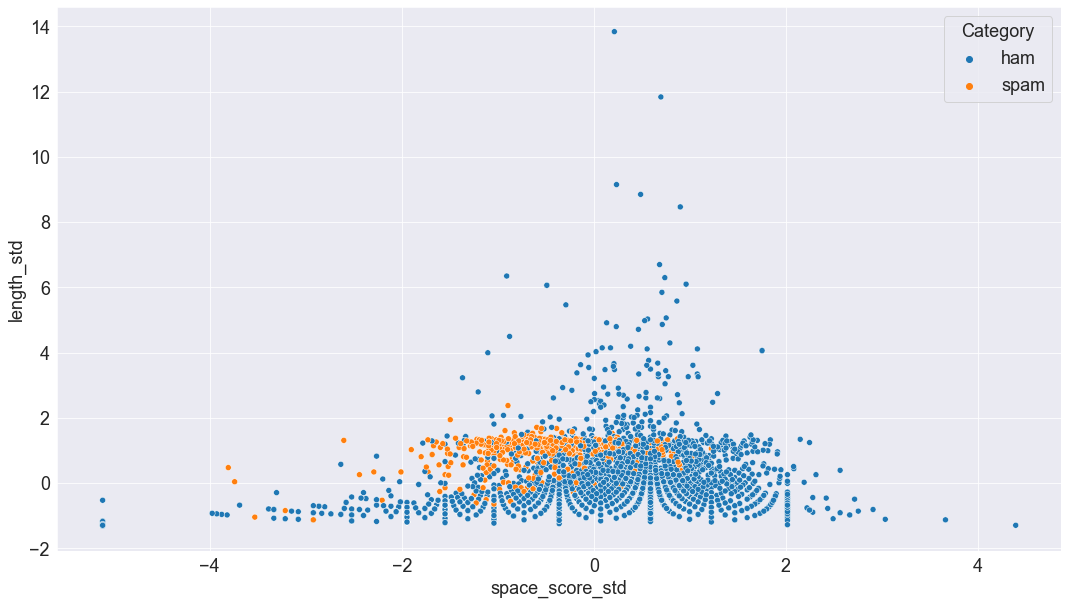

In [14]:
sns.scatterplot(x='space_score_std',y='length_std',hue='Category',data=data_raw);
fig.set(ylabel = 'Length score', xlabel = 'Space score', Title='');
fig.legend(title='Email categories');

In [17]:
# let's try some ML classification / regression techniques
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_raw,test_size=0.25)

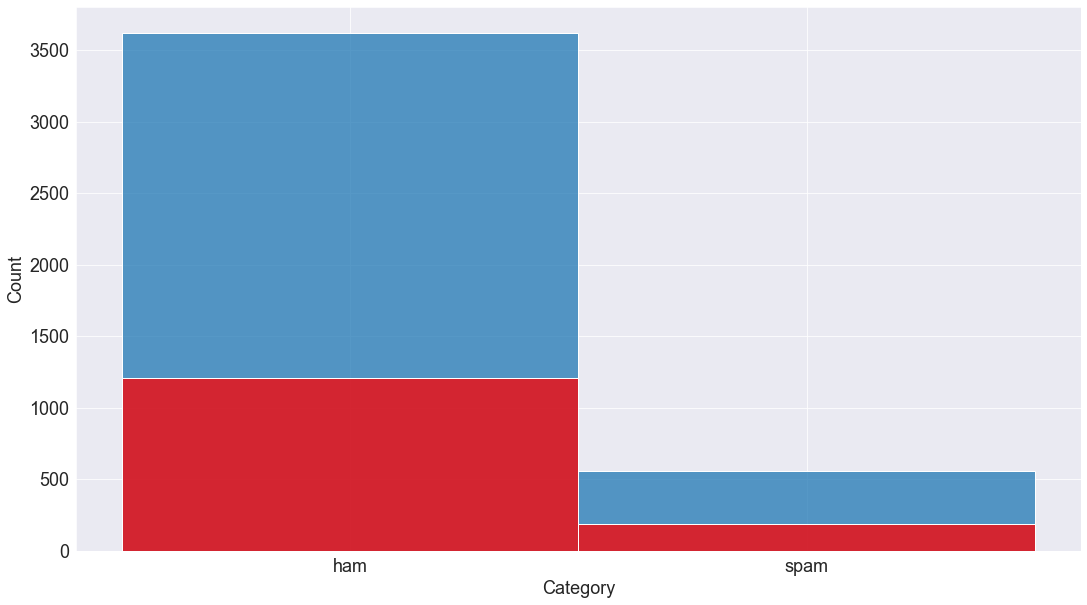

In [19]:
# check if the split is well distributed
fig = sns.histplot(train_data['Category'],multiple="stack");
sns.histplot(test_data['Category'],color='r',multiple="stack");


In [20]:
# create train and test sets
in_cols = ['lower_score_std','upper_score_std','number_score_std','symbol_score_std','length_std','space_score_std']

train_features =train_data[in_cols]
train_labels = train_data['Category_num']

test_features =test_data[in_cols]
test_labels = test_data['Category_num']


In [24]:
# logistic regression 
from sklearn.linear_model import LogisticRegression 
logistic_classifier = LogisticRegression(max_iter=200)
logistic_classifier.fit(train_features,train_labels)

LogisticRegression(max_iter=200)

In [25]:
logistic_classifier.score(train_features,train_labels)

0.9621919119406557

In [26]:
logistic_classifier.score(test_features,test_labels)

0.9712849964106246

In [27]:
logistic_classifier.coef_

array([[ 0.30218004,  0.35018378,  2.63567991, -0.93267412,  0.78098399,
        -0.62141944]])

In [28]:
# KNN
from sklearn.neighbors import KNeighborsClassifier 
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(train_features,train_labels)

KNeighborsClassifier(n_neighbors=3)

In [29]:
KNN_classifier.score(train_features,train_labels)

0.9844460397224216

In [30]:
KNN_classifier.score(test_features,test_labels)

0.9849246231155779

In [32]:
# naive bayes
from sklearn.naive_bayes import GaussianNB 
NaiveBayes_classifier = GaussianNB()
NaiveBayes_classifier.fit(train_features,train_labels)

GaussianNB()

In [33]:
NaiveBayes_classifier.score(train_features,train_labels)

0.9715242881072027

In [34]:
NaiveBayes_classifier.score(test_features,test_labels)

0.9755922469490309

In [35]:
# decision trees
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(train_features,train_labels)

DecisionTreeClassifier()

In [36]:
DT_classifier.score(train_features,train_labels)

1.0

In [37]:
DT_classifier.score(test_features,test_labels)

0.9727207465900933

In [38]:
# a basic feed forward neural network using Keras/Tensorflow

# building the net using keras
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(10 , activation='relu' , input_dim=6))
network.add(layers.Dense(10 , activation='relu'))
network.add(layers.Dense(1,activation='sigmoid'))

network.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc','Precision','Recall'])

# Training 
result = network.fit(train_features,train_labels,epochs = 15,verbose=2,validation_data= (test_features,test_labels))

Epoch 1/15
131/131 - 1s - loss: 0.3926 - acc: 0.8686 - precision: 0.8750 - recall: 0.0250 - val_loss: 0.2311 - val_acc: 0.8938 - val_precision: 1.0000 - val_recall: 0.2043
Epoch 2/15
131/131 - 1s - loss: 0.1753 - acc: 0.9478 - precision: 0.9886 - recall: 0.6185 - val_loss: 0.1243 - val_acc: 0.9727 - val_precision: 0.9805 - val_recall: 0.8118
Epoch 3/15
131/131 - 1s - loss: 0.1177 - acc: 0.9734 - precision: 0.9668 - recall: 0.8307 - val_loss: 0.0885 - val_acc: 0.9756 - val_precision: 0.9471 - val_recall: 0.8656
Epoch 4/15
131/131 - 1s - loss: 0.0962 - acc: 0.9746 - precision: 0.9541 - recall: 0.8520 - val_loss: 0.0748 - val_acc: 0.9785 - val_precision: 0.9382 - val_recall: 0.8978
Epoch 5/15
131/131 - 1s - loss: 0.0868 - acc: 0.9775 - precision: 0.9482 - recall: 0.8806 - val_loss: 0.0677 - val_acc: 0.9835 - val_precision: 0.9657 - val_recall: 0.9086
Epoch 6/15
131/131 - 1s - loss: 0.0814 - acc: 0.9782 - precision: 0.9537 - recall: 0.8806 - val_loss: 0.0645 - val_acc: 0.9821 - val_precisi

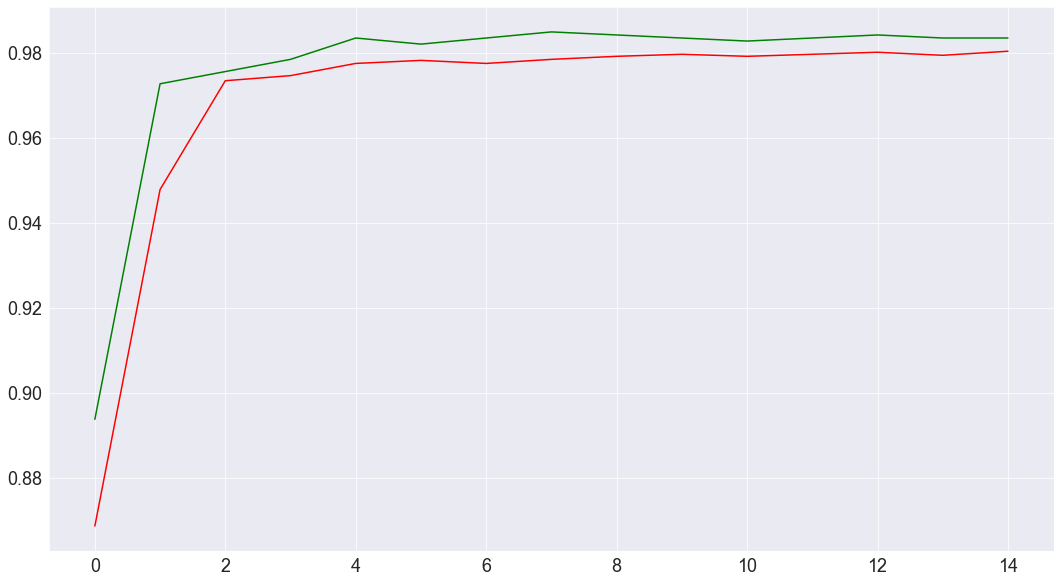

In [39]:
x = np.arange(len(result.history['loss']))
y1 = result.history['acc']
y2 = result.history['val_acc']
plt.plot(x,y1,'r');
plt.plot(x,y2,'g');

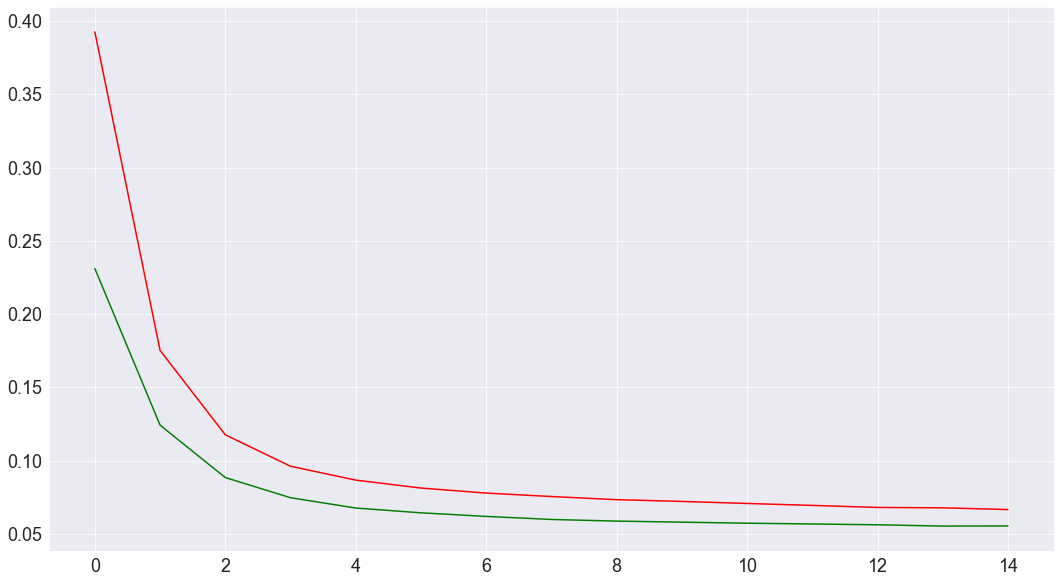

In [40]:
y1 = result.history['loss']
y2 = result.history['val_loss']
plt.plot(x,y1,'r');
plt.plot(x,y2,'g');

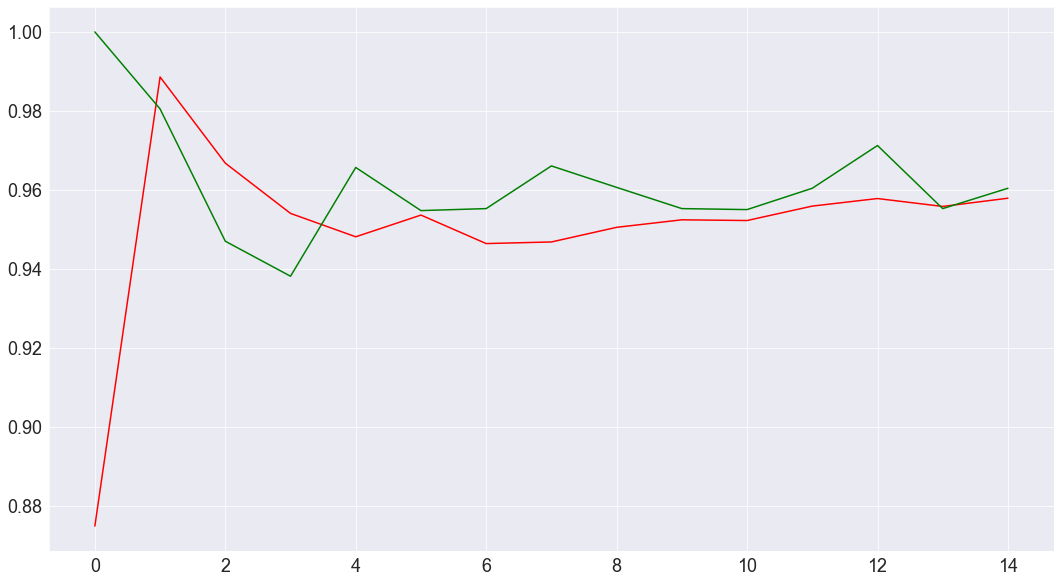

In [41]:
x = np.arange(len(result.history['loss']))
y1 = result.history['precision']
y2 = result.history['val_precision']
plt.plot(x,y1,'r');
plt.plot(x,y2,'g');

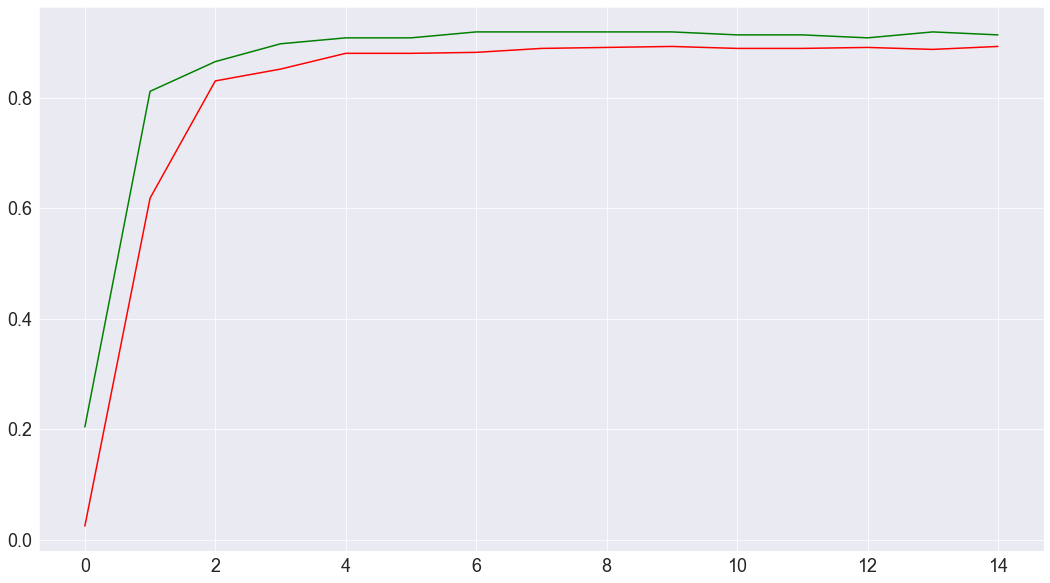

In [42]:
x = np.arange(len(result.history['loss']))
y1 = result.history['recall']
y2 = result.history['val_recall']
plt.plot(x,y1,'r');
plt.plot(x,y2,'g');